In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
import tensorflow
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### os : a built-in module with methods for interacting with the operating system, like creating files and directories, management of files and directories, input, output, environment variables, process management

##### os.listdir() method in python is used to get the list of all files and directories in the specified directory.

In [2]:
path = os.listdir("C:/Users/moham/OneDrive/Desktop/archive/melanoma_cancer_dataset")
classes ={'benign':0 , 'malignant':1}
print(path)

['test', 'train']


##### OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 

##### cv2.imread() method loads an image from the specified file.

##### cv2.IMREAD_GRAYSCALE : It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag. 

##### cv2.resize:  refers to the scaling of images. Scaling comes in handy in many image processing as well as machine learning applications. It helps in reducing the number of pixels from an image and that has several advantages e.g. It can reduce the time of training of a neural network as the more the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.

#####  append():  method appends an element to the end of the list.
##### X.append(image): will append in X list  a NumPy array for each image if the image is loaded successfully 
##### Y.append(Classes[cls]: 0 will be appended to indicate the benign class until the images in this class end. Then 1 will be appended indicating the malignant class until the images in this class end.

In [3]:
X=[]
Y=[]
for cls in classes:
    pth = 'C:/Users/moham/OneDrive/Desktop/archive/melanoma_cancer_dataset/train/'+cls
    for img in os.listdir(pth):
        image= cv2.imread(pth+'/'+img,0)
        image= cv2.resize(image,(200,200))
        X.append(image)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y= np.array(Y)

##### to count how many images are in each class

In [5]:
pd.Series(Y).value_counts()

0    5000
1    4605
Name: count, dtype: int64

##### the shape (9605, 200, 200) suggests a three-dimensional array with 9605 slices, where each slice is a 2D array of size 200x200(width x Height).

In [6]:
X.shape

(9605, 200, 200)

## Visulize one image 

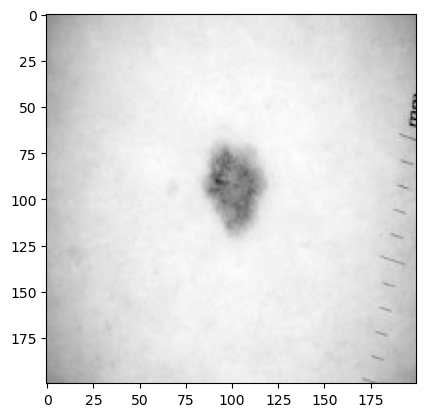

In [7]:
plt.imshow(X[0], cmap="gray")

### Prepare data
##### converting it to 2-D from 3-D array
##### Note: We can reshape an array although we don’t know all the new dimensions by using -1 as one of the dimensions

In [8]:
X_Updated = X.reshape(len(X),-1)
X_Updated.shape

(9605, 40000)

### Split data

In [9]:
xtrain,xtest, ytrain,ytest = train_test_split(X_Updated,Y,random_state=10,test_size=0.30)

In [10]:
xtrain.shape , xtest.shape

((6723, 40000), (2882, 40000))

### Normalization
##### Note: Normalization helps get data within a range and reduces the skewness which helps learn faster and better. Normalization can also tackle the diminishing and exploding gradients problems.

In [11]:
xtrain = xtrain/255
xtest = xtest/255

a7aded 3add el components 
فككوا منها ماتعملوش رن ليها تاني

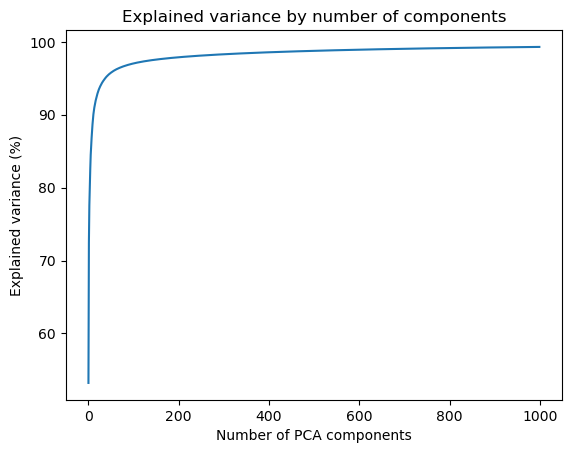

In [23]:
pca = PCA(n_components=1000).fit(xtrain) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 

### Dimensionality Reduction

##### Note: fit(): calculating the mean and variance of each of the features present in our data.
##### transform(): transforming all the features using the respective mean and variance.
##### fit_transform(): does both fits and transform.
##### so now Why we use fit_transform() on training data but transform() on the test data?
##### fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

##### بمعني اني بعرف المين و الفايرنس من الترينينج داتا ف هطبقها ع طول ع التيست مش هينفع اعمل اخد المين و الفايرنس بتاع التيست داتا عشان المفروض دي داتا احنا مانعرفهاش ف كدة انا هعمل اوفرفيتينج

In [ ]:
pca = PCA(n_components=200)
 
X_train = pca.fit_transform(xtrain)
X_test = pca.transform(xtest)


In [ ]:
X_train.shape

In [12]:
# Reshape the input data for CNN
x_train = xtrain.reshape(xtrain.shape[0], 200, 200, 1)
x_test = xtest.reshape(xtest.shape[0], 200, 200, 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, ytrain, epochs=10, validation_data=(x_test, ytest))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, ytest)
print(f'Test accuracy: {test_acc}')




Epoch 1/10


211/211 [==============================] - 276s 1s/step - loss: 0.4959 - accuracy: 0.7415 - val_loss: 0.3565 - val_accuracy: 0.8331
Epoch 2/10
211/211 [==============================] - 299s 1s/step - loss: 0.3532 - accuracy: 0.8295 - val_loss: 0.4220 - val_accuracy: 0.8210
Epoch 3/10
211/211 [==============================] - 315s 1s/step - loss: 0.3490 - accuracy: 0.8364 - val_loss: 0.3291 - val_accuracy: 0.8473
Epoch 4/10
211/211 [==============================] - 329s 2s/step - loss: 0.3200 - accuracy: 0.8496 - val_loss: 0.3204 - val_accuracy: 0.8584
Epoch 5/10
211/211 [==============================] - 326s 2s/step - loss: 0.3015 - accuracy: 0.8630 - val_loss: 0.3296 - val_accuracy: 0.8584
Epoch 6/10
211/211 [==============================] - 343s 2s/step - loss: 0.2973 - accuracy: 0.8654 - val_loss: 0.3364 - val_accuracy: 0.8515
Epoch 7/10
211/211 [==============================] - 332s 2s/step - loss: 0.2838 - accuracy: 0.8754 - val_loss: 0.3416 - val_accuracy: 0

In [13]:
# Make predictions
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Classification report
print("Classification Report:")
print(classification_report(ytest, y_pred))

91/91 [==============================] - 25s 269ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1541
           1       0.86      0.82      0.84      1341

    accuracy                           0.85      2882
   macro avg       0.86      0.85      0.85      2882
weighted avg       0.86      0.85      0.85      2882



In [14]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))

Confusion Matrix:
[[1370  171]
 [ 248 1093]]


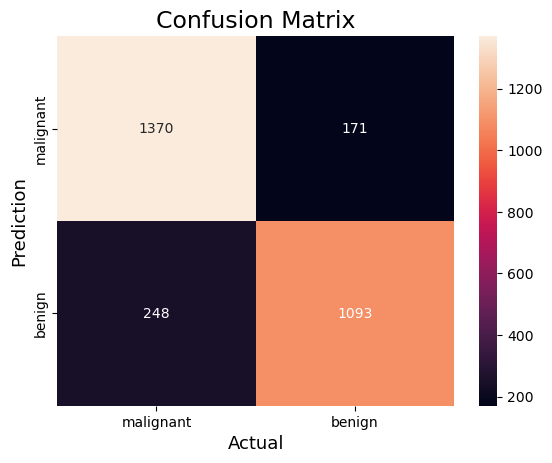

In [15]:
###Plot the confusion matrix.###
sns.heatmap(confusion_matrix(ytest, y_pred),annot=True,fmt='g',
xticklabels=['malignant', 'benign'],
yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [16]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred)

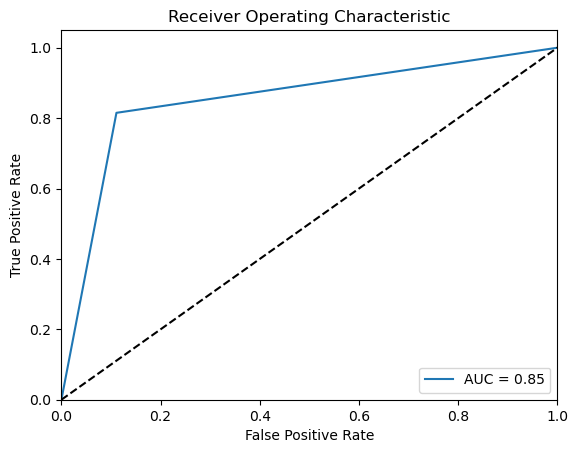

In [17]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train, ytrain)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Access the coefficients
coefficients = svm_model.coef_

# Print the coefficients
print("Coefficients:\n", coefficients)

Accuracy: 80.08%
Coefficients:
 [[-0.0396635  -0.0461214  -0.02697566 ... -0.01112887  0.03602513
   0.09356446]]


In [31]:
# Assuming ytest and y_pred are the true and predicted labels, respectively
classes = np.unique(np.concatenate((ytest, y_pred)))

# Compute precision, recall, F1-score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(ytest, y_pred, labels=classes, average=None)

# Create a dictionary to store the results
results = {
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}

# Print the F1-score matrix and accuracy
print("F1-Score Matrix:")
print(pd.DataFrame(results, index=classes))
print("\nAccuracy:", accuracy)


F1-Score Matrix:
   Precision    Recall  F1-Score  Support
0   0.794997  0.845555  0.819497     1541
1   0.808528  0.749441  0.777864     1341

Accuracy: 0.8008327550312283


In [18]:
dec = {0:'benign', 1:'malignant'}

In [ ]:
p = os.listdir('C://Users//moham//OneDrive//Desktop//archive//melanoma_cancer_dataset//test//benign//')
plt.figure(figsize=(12,8))
c=1 #counter
# Iterates over the first 9 image files in the 'benign' directory of the testing set. 
for i in os.listdir('C://Users//moham//OneDrive//Desktop//archive//melanoma_cancer_dataset//test//benign//')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C://Users//moham//OneDrive//Desktop//archive//melanoma_cancer_dataset//test//benign//'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1